In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv("HR_DATA.csv")
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


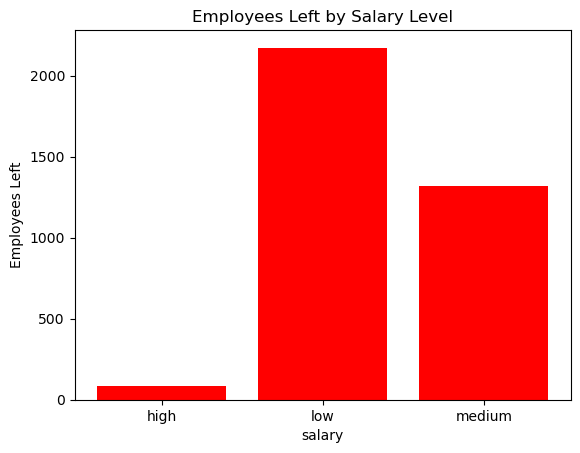

In [9]:
salary_retention = df.groupby('salary')['left'].sum()
plt.bar(salary_retention.index, salary_retention.values, color="red")
plt.xlabel("salary")
plt.ylabel("Employees Left")
plt.title("Employees Left by Salary Level")
plt.show()


Text(0.5, 1.0, 'Employee Retention by Department')

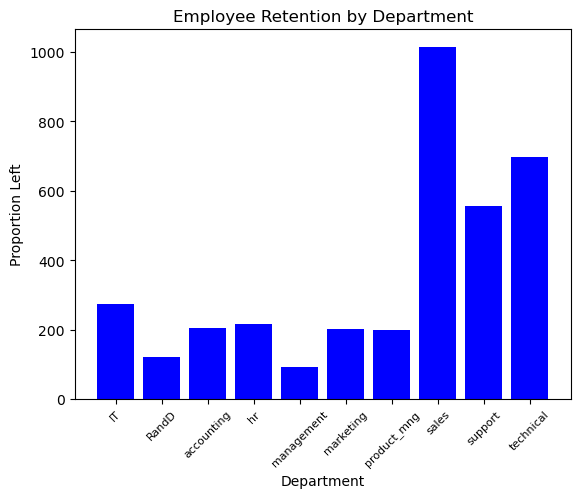

In [13]:
dept_retention = df.groupby('Department')['left'].sum()
plt.bar(dept_retention.index, dept_retention.values, color="blue")
plt.xticks(rotation=45, fontsize=8)
plt.xlabel("Department")
plt.ylabel("Proportion Left")
plt.title("Employee Retention by Department")

In [26]:
df_dummies=pd.get_dummies(df,columns=['Department','salary'])
x=df_dummies.drop('left',axis=1)
y=df['left']

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [29]:
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [31]:
print(x.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')


In [33]:
new_employee = [[0.8, 0.7, 4, 200, 3, 0, 0,  
                 1,0,0,0,0,0,0,0,            
                 1,0,1,0,0]]  
model.predict(new_employee)

C:\Users\Muhammad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])